In [1]:
import torch
from torch import nn
from torch.distributions import Normal
from torchvision import transforms
import torchvision
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torchvision.utils as vutils
from tqdm import tqdm
import numpy as np

In [3]:
class Encoder(nn.Module):
    def __init__(self, in_features, latent_dim, layers, bias = True):
        super(Encoder, self).__init__()
        inSize = in_features
        modules = []
        for x in layers:
            modules.append(nn.Linear(inSize,x,bias = bias))
            modules.append(nn.ReLU())
            inSize = x
        modules.append(nn.Linear(inSize, 2*latent_dim))
        self.model = nn.Sequential(*modules)
            
    def forward(self, input):
        mu, logsigma = self.model(input).chunk(2, dim = -1)
        return mu, logsigma

class Decoder(nn.Module):
    def __init__(self, in_features, latent_dim, layers, bias = True):
        super(Decoder, self).__init__()
        inSize = latent_dim
        modules = []
        for x in layers:
            modules.append(nn.Linear(inSize,x,bias = bias))
            modules.append(nn.ReLU())
            inSize = x
        modules.append(nn.Linear(inSize, in_features))
        modules.append(nn.Sigmoid())
        self.model = nn.Sequential(*modules)
        
    def forward(self, z):
        return self.model(z)

In [4]:
class VAE(nn.Module):
    def __init__(self,in_features, latent_dim = 32, layers = [512,256,128,64], bias = True):
        super(VAE,self).__init__()
        self.encoder = Encoder(in_features, latent_dim, layers, bias = True)
        self.decoder = Decoder(in_features, latent_dim, reversed(layers), bias = True)
    
    def forward(self, input):
        input = input.flatten(start_dim = 1)
        mu, logsigma = self.encoder(input)
        std = torch.exp(0.5 * logsigma)
        z = Normal(mu,std).rsample()
        output = self.decoder(z)
        return output, input, mu, logsigma

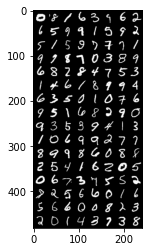

In [5]:
batch_size = 128
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_workers = 2 if device =='cuda' else 0
dataset = torchvision.datasets.MNIST(root = './data', download = True, transform = transforms.Compose([transforms.Grayscale(),
                                                                                                       transforms.ToTensor()
                                                                                                      ]))
                                                                                     

dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

real_batch, labels = next(iter(dataloader))
plt.imshow(transforms.ToPILImage()(make_grid(real_batch)))

it: 0; loss: 552.5865478515625 : : 0it [00:00, ?it/s]

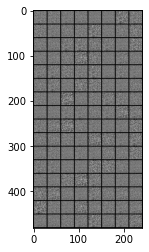

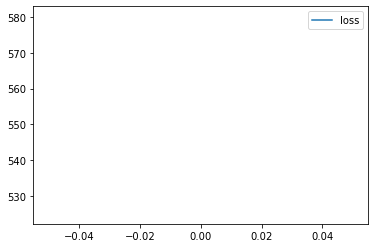

it: 468; loss: 162.15765380859375 : : 469it [00:12, 37.97it/s]
it: 469; loss: 159.87889099121094 : : 0it [00:00, ?it/s]

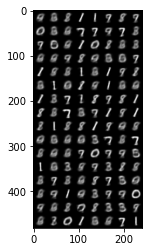

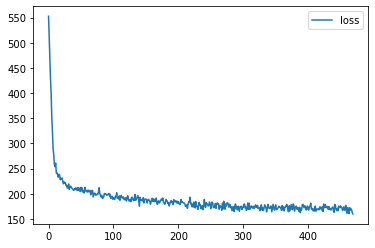

it: 937; loss: 165.80731201171875 : : 469it [00:12, 38.74it/s]
it: 938; loss: 164.44326782226562 : : 0it [00:00, ?it/s]

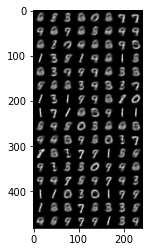

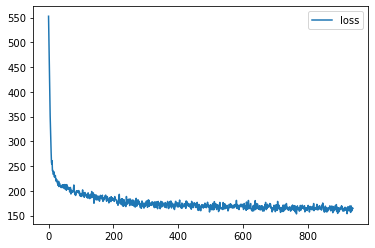

it: 1406; loss: 163.85482788085938 : : 469it [00:12, 39.08it/s]
it: 1407; loss: 150.30862426757812 : : 0it [00:00, ?it/s]

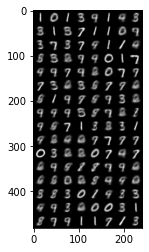

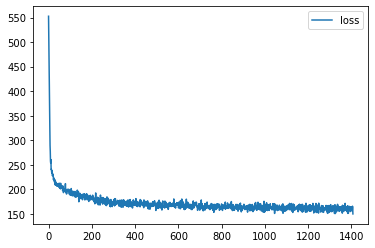

it: 1875; loss: 154.2547607421875 : : 469it [00:12, 38.66it/s] 
it: 1876; loss: 161.1367645263672 : : 0it [00:00, ?it/s]

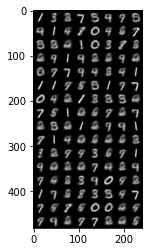

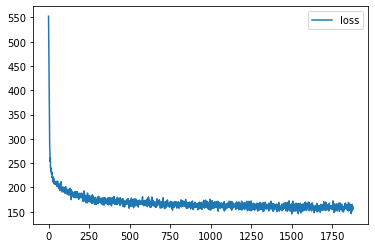

it: 2344; loss: 148.27145385742188 : : 469it [00:13, 35.64it/s]
it: 2345; loss: 155.49374389648438 : : 0it [00:00, ?it/s]

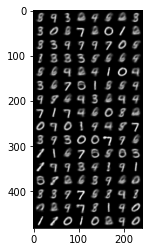

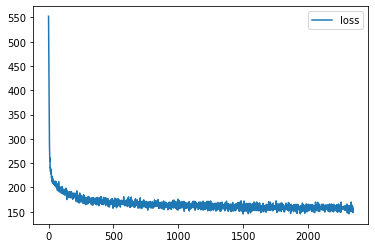

it: 2813; loss: 156.99327087402344 : : 469it [00:12, 37.72it/s]
it: 2814; loss: 154.12767028808594 : : 0it [00:00, ?it/s]

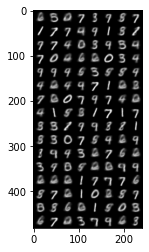

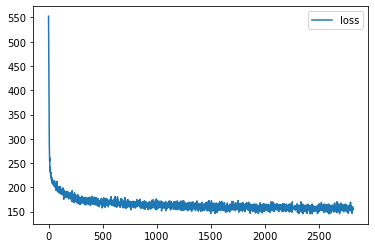

it: 3282; loss: 154.11988830566406 : : 469it [00:11, 39.25it/s]
it: 3283; loss: 157.08497619628906 : : 0it [00:00, ?it/s]

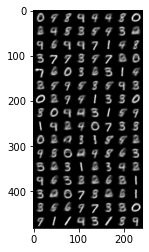

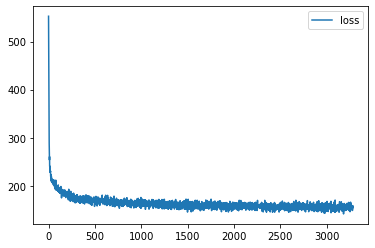

it: 3751; loss: 155.37660217285156 : : 469it [00:11, 39.44it/s]
it: 3752; loss: 160.6077423095703 : : 0it [00:00, ?it/s]

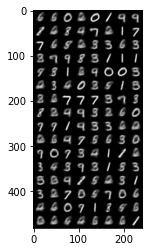

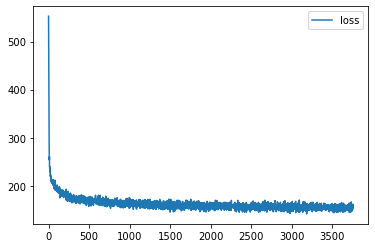

it: 4220; loss: 157.12960815429688 : : 469it [00:12, 39.06it/s]
it: 4221; loss: 152.17544555664062 : : 0it [00:00, ?it/s]

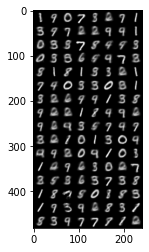

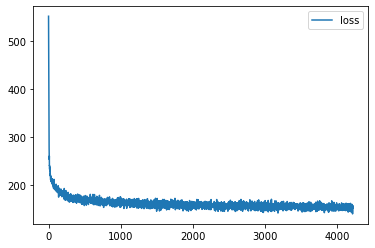

it: 4689; loss: 149.84844970703125 : : 469it [00:12, 38.26it/s]
it: 4690; loss: 158.08132934570312 : : 0it [00:00, ?it/s]

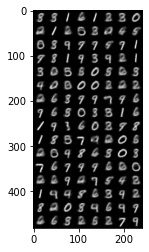

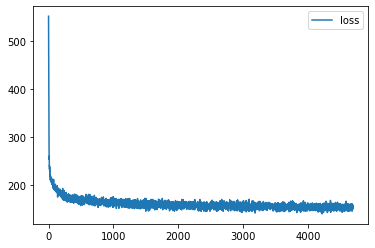

it: 5158; loss: 145.41845703125 : : 469it [00:12, 38.18it/s]   
it: 5159; loss: 150.89024353027344 : : 0it [00:00, ?it/s]

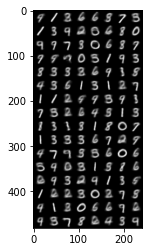

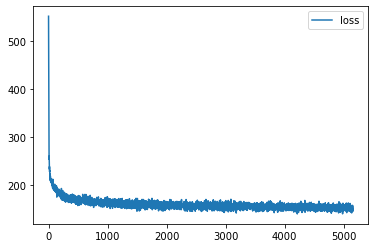

it: 5627; loss: 153.52096557617188 : : 469it [00:12, 38.10it/s]
it: 5628; loss: 150.0225830078125 : : 0it [00:00, ?it/s]

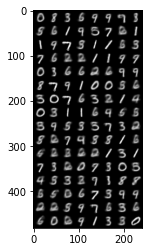

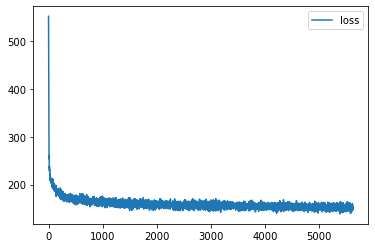

it: 6096; loss: 155.13644409179688 : : 469it [00:12, 38.68it/s]
it: 6097; loss: 156.33592224121094 : : 0it [00:00, ?it/s]

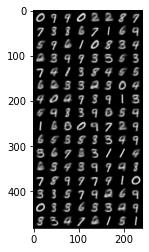

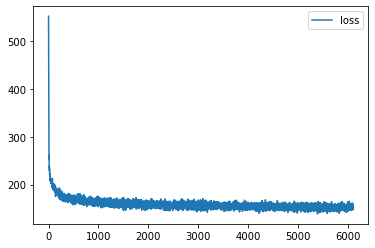

it: 6565; loss: 160.0137481689453 : : 469it [00:12, 39.04it/s] 
it: 6566; loss: 151.04513549804688 : : 0it [00:00, ?it/s]

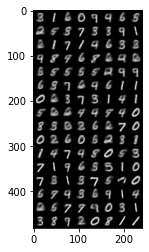

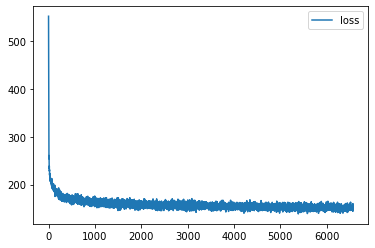

it: 7034; loss: 151.0810089111328 : : 469it [00:12, 38.75it/s] 
it: 7035; loss: 154.43496704101562 : : 0it [00:00, ?it/s]

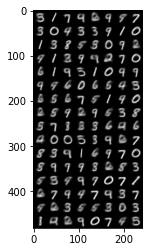

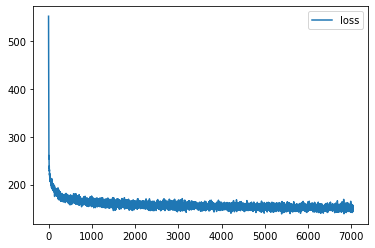

it: 7503; loss: 150.686767578125 : : 469it [00:12, 38.00it/s]  
it: 7504; loss: 152.3208770751953 : : 0it [00:00, ?it/s]

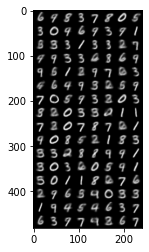

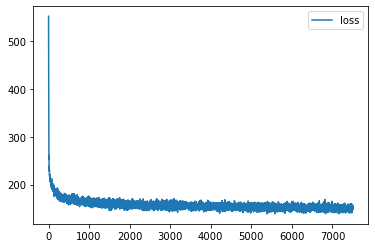

it: 7972; loss: 144.46339416503906 : : 469it [00:12, 38.82it/s]
it: 7973; loss: 147.73841857910156 : : 0it [00:00, ?it/s]

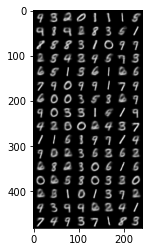

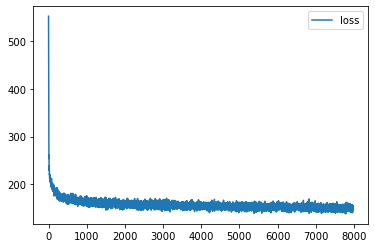

it: 8441; loss: 147.5892791748047 : : 469it [00:12, 38.80it/s] 
it: 8442; loss: 159.85931396484375 : : 0it [00:00, ?it/s]

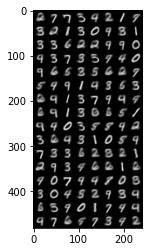

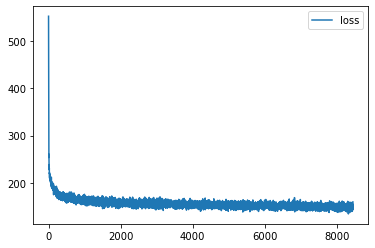

it: 8910; loss: 151.2489013671875 : : 469it [00:11, 39.17it/s] 
it: 8911; loss: 145.78509521484375 : : 0it [00:00, ?it/s]

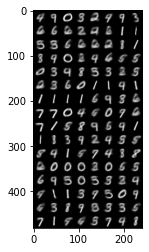

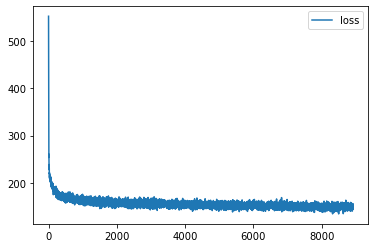

it: 9379; loss: 149.9013214111328 : : 469it [00:12, 38.58it/s] 
it: 9380; loss: 147.6124267578125 : : 0it [00:00, ?it/s]

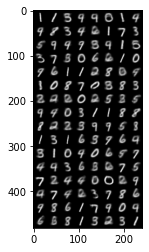

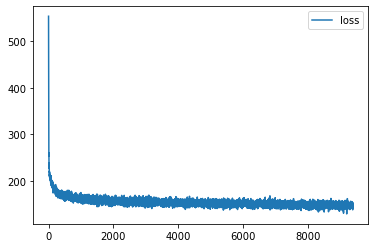

it: 9848; loss: 148.4313201904297 : : 469it [00:12, 37.66it/s] 
it: 9849; loss: 148.984375 : : 0it [00:00, ?it/s]

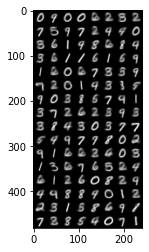

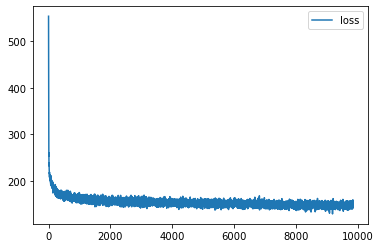

it: 10317; loss: 151.07879638671875 : : 469it [00:12, 37.01it/s]
it: 10318; loss: 152.87818908691406 : : 0it [00:00, ?it/s]

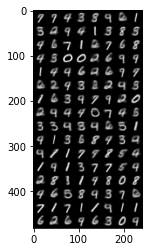

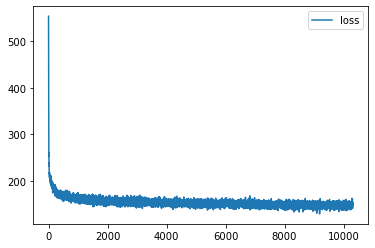

it: 10786; loss: 158.8900146484375 : : 469it [00:13, 36.04it/s] 
it: 10787; loss: 157.48692321777344 : : 0it [00:00, ?it/s]

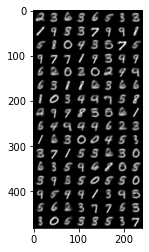

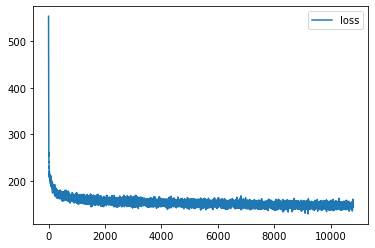

it: 11255; loss: 156.22286987304688 : : 469it [00:12, 38.26it/s]
it: 11256; loss: 142.99221801757812 : : 0it [00:00, ?it/s]

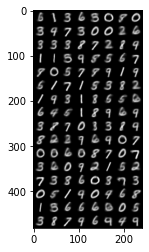

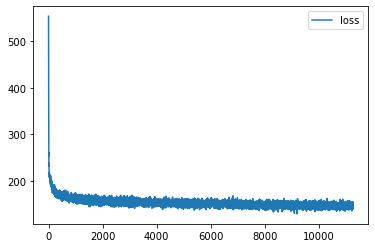

it: 11724; loss: 144.91159057617188 : : 469it [00:12, 38.59it/s]
it: 11725; loss: 154.63526916503906 : : 0it [00:00, ?it/s]

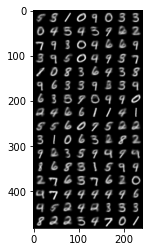

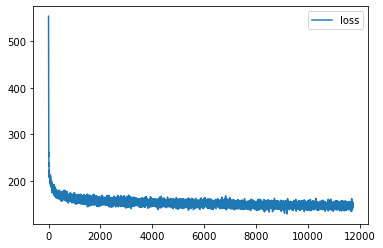

it: 12193; loss: 146.94122314453125 : : 469it [00:12, 36.77it/s]
it: 12194; loss: 139.2823486328125 : : 0it [00:00, ?it/s]

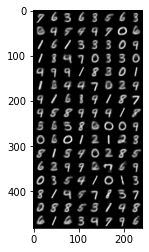

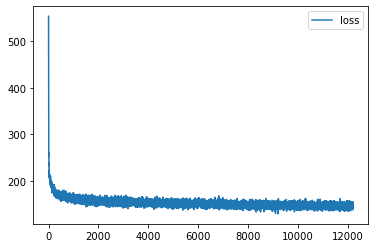

it: 12662; loss: 142.1722869873047 : : 469it [00:12, 37.30it/s] 
it: 12663; loss: 144.00025939941406 : : 0it [00:00, ?it/s]

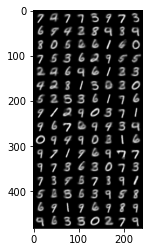

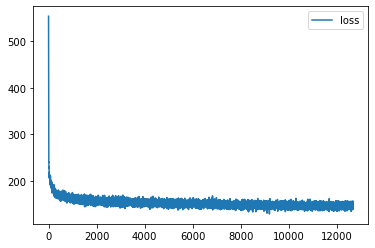

it: 13131; loss: 141.64889526367188 : : 469it [00:12, 36.90it/s]
it: 13132; loss: 150.82615661621094 : : 0it [00:00, ?it/s]

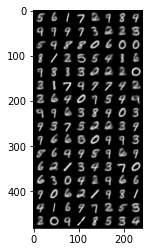

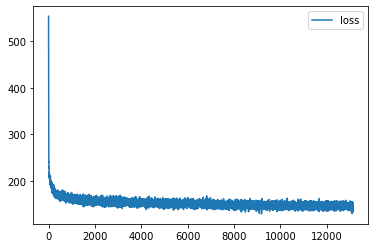

it: 13600; loss: 144.9263153076172 : : 469it [00:12, 37.87it/s] 
it: 13601; loss: 149.42276000976562 : : 0it [00:00, ?it/s]

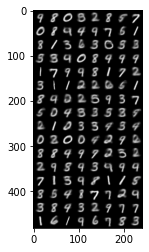

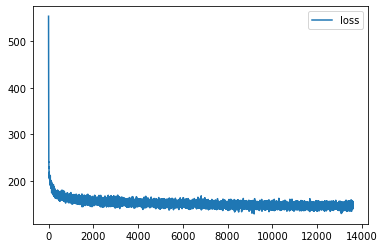

it: 14069; loss: 146.3480224609375 : : 469it [00:12, 38.52it/s] 
it: 14070; loss: 142.9259033203125 : : 0it [00:00, ?it/s]

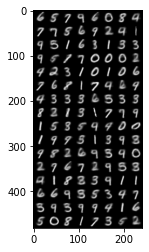

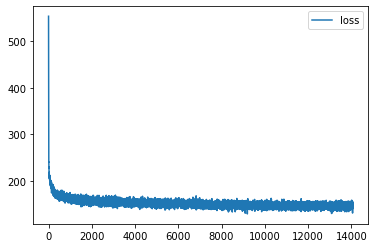

it: 14538; loss: 150.39462280273438 : : 469it [00:12, 38.71it/s]
it: 14539; loss: 139.74046325683594 : : 0it [00:00, ?it/s]

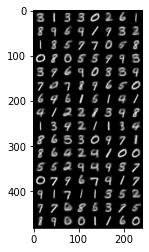

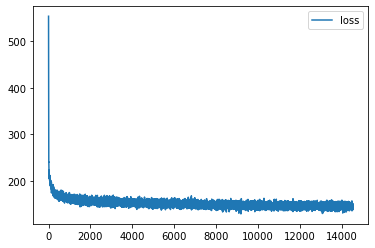

it: 15007; loss: 148.3323211669922 : : 469it [00:12, 38.60it/s] 
it: 15008; loss: 138.21031188964844 : : 0it [00:00, ?it/s]

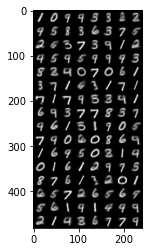

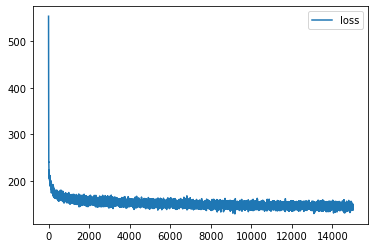

it: 15476; loss: 145.7618408203125 : : 469it [00:12, 36.94it/s] 
it: 15477; loss: 147.3931884765625 : : 0it [00:00, ?it/s]

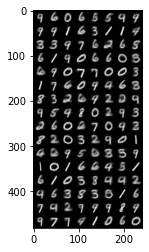

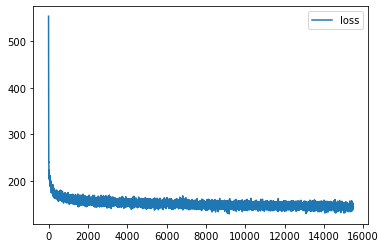

it: 15945; loss: 151.05105590820312 : : 469it [00:12, 38.40it/s]
it: 15946; loss: 149.32887268066406 : : 0it [00:00, ?it/s]

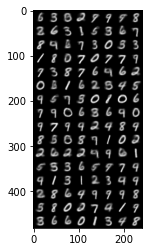

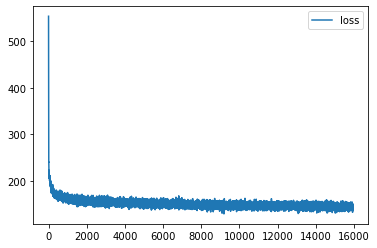

it: 16414; loss: 150.97933959960938 : : 469it [00:12, 38.72it/s]
it: 16415; loss: 149.69696044921875 : : 0it [00:00, ?it/s]

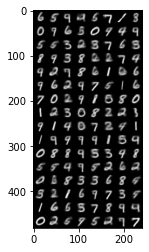

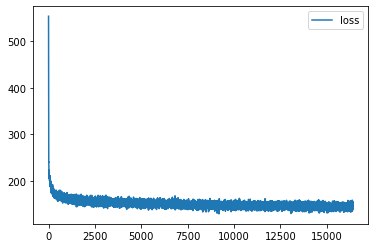

it: 16883; loss: 151.4120330810547 : : 469it [00:12, 36.95it/s] 
it: 16884; loss: 147.5252227783203 : : 0it [00:00, ?it/s]

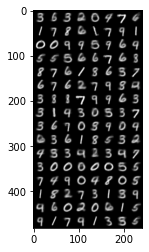

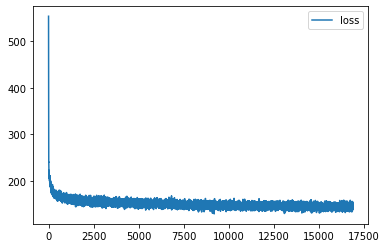

it: 17352; loss: 152.11599731445312 : : 469it [00:12, 36.99it/s]
it: 17353; loss: 146.03025817871094 : : 0it [00:00, ?it/s]

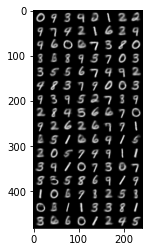

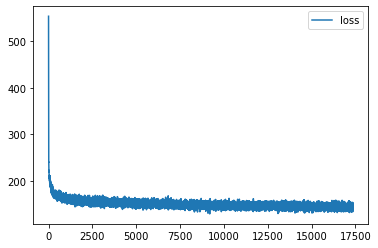

it: 17821; loss: 148.93214416503906 : : 469it [00:12, 37.55it/s]
it: 17822; loss: 141.19168090820312 : : 0it [00:00, ?it/s]

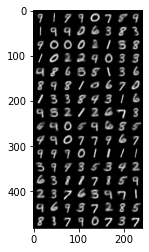

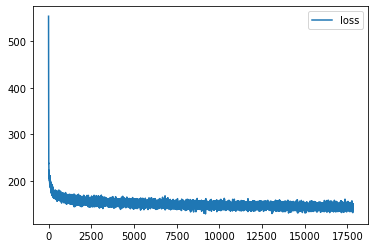

it: 17872; loss: 138.50204467773438 : : 51it [00:01, 33.42it/s]


KeyboardInterrupt: 

In [6]:
beta1 = 0.9
beta2 = 0.999
lr = 0.001
nb_epochs = 50
display_freq = 1000
in_features = next(iter(dataloader))[0].flatten(start_dim = 1).shape[1]
latent_dim = 2 
layers = [512]
model = VAE(in_features,latent_dim = latent_dim,layers = layers).to(device)
vae_opt = torch.optim.Adam(model.parameters(), lr=lr, betas=(beta1, beta2))
loss_fn = nn.BCELoss(reduction="sum")

j = 0
kl_losses = []
reconstruction_losses = []
losses = []
for epoch in range(nb_epochs):
    pbar = tqdm(enumerate(dataloader))
    for i ,batch in pbar:
        im, _ = batch
        im = im.to(device)
        
        cur_batch, channel, width, hidth = im.shape
        
        im_reconstructed, im, mu, logsigma = model(im)

        kl_penality = -0.5 * torch.mean(torch.sum(1 + logsigma - mu.pow(2) - logsigma.exp(),dim = 1)) 
        reconstruction_loss = loss_fn(im_reconstructed, im) / cur_batch
        loss = (reconstruction_loss + kl_penality)
        
        #kl_losses.append(kl_penality.item())
        #reconstruction_losses.append(reconstruction_loss.item())
        losses.append(loss.item())
        
        vae_opt.zero_grad()
        loss.backward()
        vae_opt.step()
        
        
        pbar.set_description(f"it: {j}; loss: {loss} ")
        
        
        if i%display_freq == 0:
            im_reconstructed = im_reconstructed.view(cur_batch, channel, width, hidth)
            img = make_grid(im_reconstructed, padding=2, normalize=True)
            plt.imshow(transforms.ToPILImage()(img))
            plt.show()
        
            #plt.plot(range(len(kl_losses)), kl_losses, label = "kl_penality")
            #plt.plot(range(len(reconstruction_losses)), reconstruction_losses, label = "reconstruction_loss")
            
            plt.plot(range(len(losses)), losses, label = "loss")
            
            plt.legend()
            plt.show()
        j += 1

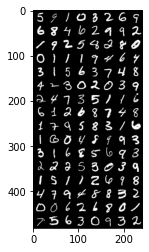

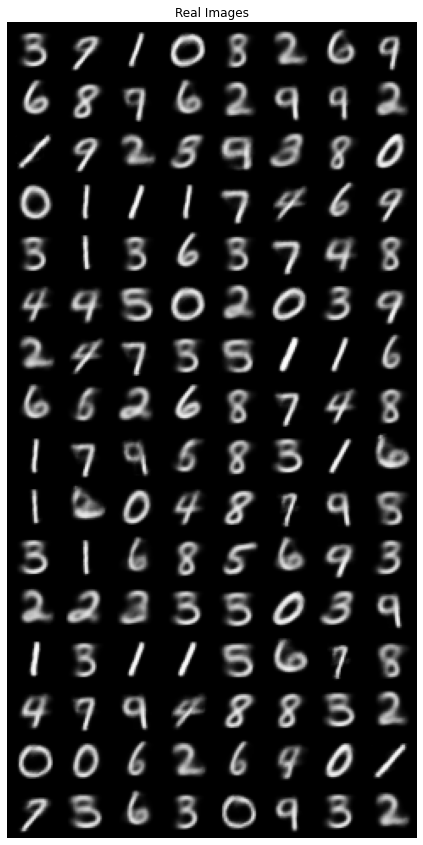

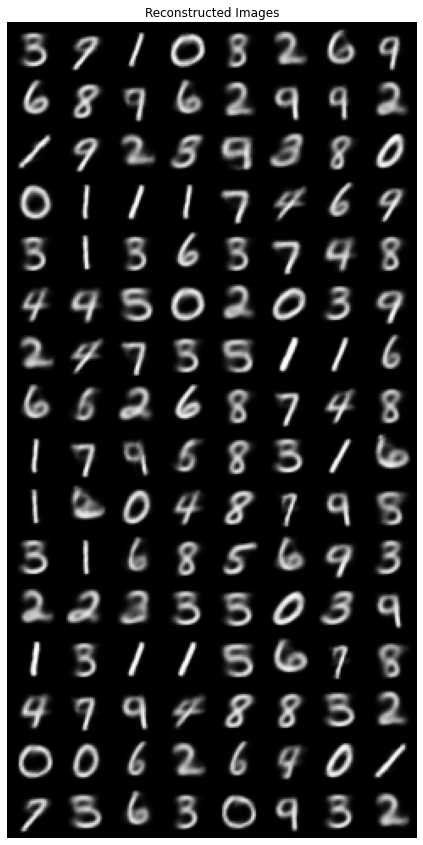

In [148]:
real_batch, _ = next(iter(dataloader))
im = real_batch.to(device)
cur_batch, channel, width, hidth = im.shape
################################################################################
im_reconstructed, _, mu, logsigma = model(im)
im_reconstructed = im_reconstructed.view(cur_batch, channel, width, hidth)
img = make_grid(im, padding=2, normalize=True)
plt.imshow(transforms.ToPILImage()(img))
plt.figure(figsize=(15,15))
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(img.cpu(),(1,2,0)))
plt.savefig( "./real_Images.png" )
################################################################################
img = make_grid(im_reconstructed, padding=2, normalize=True)
plt.imshow(transforms.ToPILImage()(img))
plt.figure(figsize=(15,15))
plt.axis("off")
plt.title("Reconstructed Images")
plt.imshow(np.transpose(img.cpu(),(1,2,0)))
plt.savefig( "./reconstructed_Images.png" )


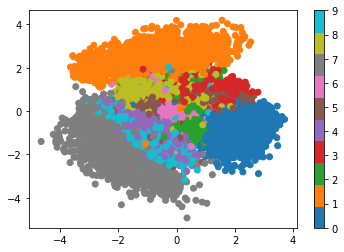

In [11]:
def plot_latent(autoencoder, data, num_batches=128):
    for i, (x, y) in enumerate(data):
        x = x.flatten(start_dim = 1)
        mu, logsigma = autoencoder.encoder(x.to(device))
        std = torch.exp(0.5 * logsigma)
        z = Normal(mu,std).rsample()
        z = z.to('cpu').detach().numpy()
        plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
        if i > num_batches:
            plt.colorbar()
            break
    plt.savefig( "./latent_space.png" )

plot_latent(model,dataloader)

In [16]:
def plot_reconstructed(autoencoder, r0=(-5, 10), r1=(-10, 5), n=12):
    w = 28
    img = np.zeros((n*w, n*w))
    for i, y in enumerate(np.linspace(*r1, n)):
        for j, x in enumerate(np.linspace(*r0, n)):
            z = torch.Tensor([[x, y]]).to(device)
            x_hat = autoencoder.decoder(z)
            x_hat = x_hat.reshape(28, 28).to('cpu').detach().numpy()
            img[(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = x_hat
    plt.imshow(img, extent=[*r0, *r1], cmap='gray')
    plt.savefig( "./affichage_.png" )


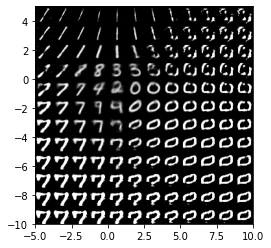

In [17]:
plot_reconstructed(model)